# Permutation Feature Importance
This code serves as example for the application of the Permutation Feature Importance technique. The aim is to disrupt the relationship between a given feature with the model outcome. The ratio of a given error metrics in the regular and permuted condition is then evaluated. The more the ratio, the more the feature is *important*. 

The error metrics here used is the mean-squared error (MSE). Such a method refers to [1]. The model to which the example is entrusted is the one published in [2], whereas the database is a modified version of the same used in [2].

## References
- [1] Breiman (2001). *Random forests*, Machine Learning. doi: [10.1023/a:1010933404324](https://doi.org/10.1023/a:1010933404324)
- [2] Mascia et al. (2023). *Machine learning aided jump height estimate democratization through smartphone measures*, Frontiers in Sports and Active Living. doi: [10.3389/fspor.2023.1112739](https://doi.org/10.3389/fspor.2023.1112739)

In [1]:
# Load required modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
import pickle

# Set font for all plots to Liberation Sans
plt.rcParams["font.family"] = "Liberation Sans"

# Mean Squared Error for Permutation Feature Importance
def MeSqEr(y, y_hat):
    n = y.shape[0]
    SE = np.zeros_like(y)
    for j in range(0, n):
            SE[j] = (y[j] - y_hat[j]) ** 2

    return np.sum(SE) / n

/home/maskul/.anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator MLPRegressor from version 1.1.2 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(


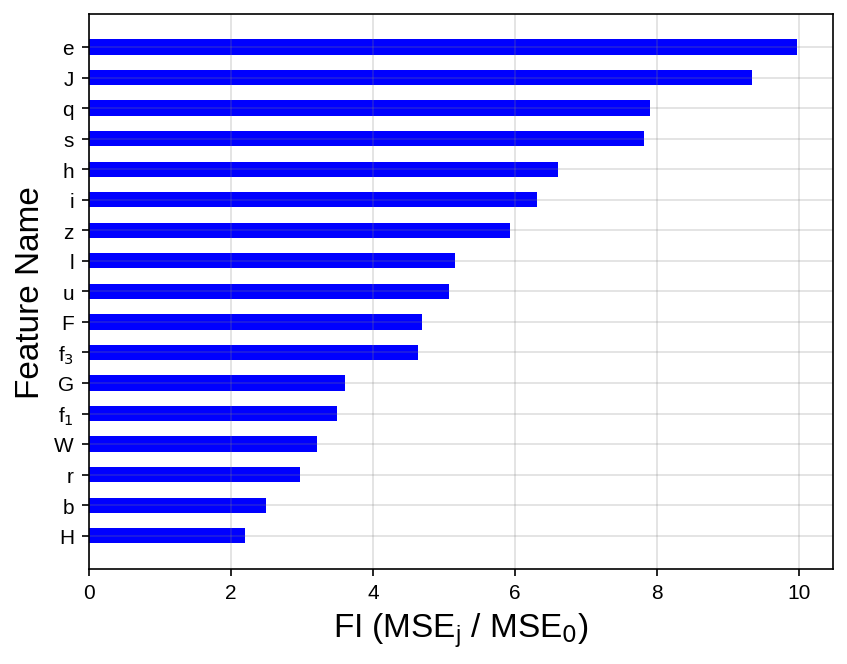

In [2]:
# Load features db and the response
root = './data/permuted_DB/DBP_'
DB = pd.read_csv('./data/PFI_DB.csv')

# Load previously saved model
NN = pickle.load(open('./data/PFI_Model.sav', 'rb'))

cols = ['h', 'b', 'e', 'F', 'G', 'H', 'i', 'J', 'l', 'q', 'r', 's', 'u', 'W', 'z', 'f3', 'f1']
X = DB.drop('y', axis=1)

MSE = np.zeros(17)
FI = np.zeros(17)

y = pd.read_csv('./data/PFI_DB.csv')['y']
y_hat = NN.predict(X)

MSE_0 = MeSqEr(y, y_hat)

for i in range(0, len(cols)):
    DBP = pd.read_csv(root + cols[i] + '.csv') # Load csv as a DataFrame
    y = DBP['y']
    X = DBP.drop('y', axis=1)
    y_hat = NN.predict(X)
    
    MSE[i] = MeSqEr(y, y_hat)
    FI[i] =  MSE[i] / MSE_0

FI = FI.T
cols_plt = ['h', 'b', 'e', 'F', 'G', 'H', 'i', 'J', 'l', 'q', 'r', 's', 'u', 'W', 'z', 'f$_3$', 'f$_1$']

# MLP
df = pd.DataFrame(FI, index=cols_plt)
df.columns = ['FI']
DF = df.sort_values(by=['FI'], ascending=True)

plt.figure(dpi = 150)
plt.grid(color='grey', linestyle='-', linewidth=.2)
plt.barh(DF.index, DF['FI'], height = .5, color = 'blue')
plt.ylabel('Feature Name', fontsize = 16)
plt.xlabel('FI (MSE$\mathregular{_j}$ / MSE$_0$)', fontsize = 16)
plt.yticks(fontsize = 10)

plt.savefig('./img/PFI_FIG.png')